# Классификация

### Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
balance_scale_df = pd.read_csv('../data/balance_scale_preprocessed.csv')

In [3]:
balance_scale_df.head()

,Class_Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
balance_scale_df['Class_Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [5]:
X = balance_scale_df.iloc[:, 1:5].values
y = balance_scale_df.iloc[:, 0].values

In [6]:
print(X)

[[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 ...
 [5 5 5 3]
 [5 5 5 4]
 [5 5 5 5]]


### Разбиение выборки

Разбиваем исходные данные на обучающую и контрольную выборки. Обучающая выборка составляет 80% от объема исходных данных, а контрольная составляет, соответственно, 20%.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[ 0.69936612, -1.40580389,  1.44059563,  1.38920607],
       [-0.71064622, -1.40580389,  0.03923801,  0.69041026],
       [-1.41565239,  1.40580389, -1.36211961, -1.40597717],
       ...,
       [ 1.4043723 ,  1.40580389,  0.73991682, -1.40597717],
       [ 0.69936612, -0.70290195,  1.44059563, -0.00838555],
       [-0.00564005,  1.40580389, -1.36211961, -0.00838555]])

### Метод k-ближайших соседей (K-Nearest Neighbors)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  4  6]
 [ 3 49  2]
 [ 3  3 55]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.88      0.91      0.89        54
           R       0.87      0.90      0.89        61

    accuracy                           0.83       125
   macro avg       0.58      0.60      0.59       125
weighted avg       0.80      0.83      0.82       125



Один из способов найти наилучшее значение K - построить график значения K и соответствующую частоту ошибок для набора данных.
В этом разделе мы наметим среднюю ошибку для прогнозируемых значений тестового набора для всех значений K от 1 до 40.

Для этого сначала вычислим среднее погрешности для всех прогнозируемых значений, где K колеблется от 1 до 40. 

In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Приведенный выше скрипт выполняет цикл от 1 до 40. На каждой итерации вычисляется средняя ошибка для предсказанных значений тестового набора, и результат добавляется в *error* список.

Следующим шагом будет построение графика зависимости *error* значений от K.

Text(0, 0.5, 'Mean Error')

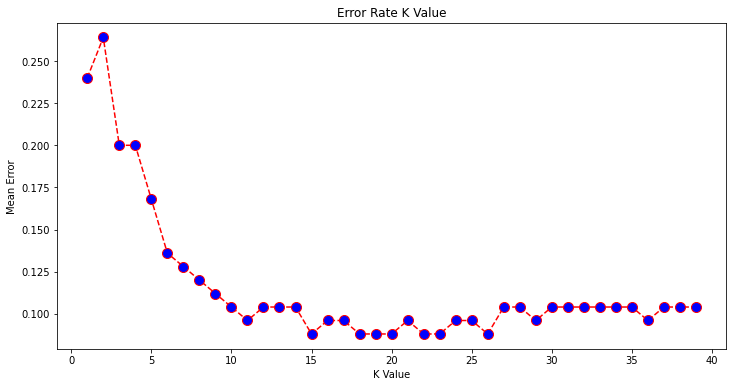

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Из выходных данных мы видим, что средняя ошибка равна нулю, когда значение K равно либо 15, либо 26, либо находится в промежутках от 18 до 20 и от 22 до 23.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1  4  5]
 [ 0 54  0]
 [ 0  2 59]]
              precision    recall  f1-score   support

           B       1.00      0.10      0.18        10
           L       0.90      1.00      0.95        54
           R       0.92      0.97      0.94        61

    accuracy                           0.91       125
   macro avg       0.94      0.69      0.69       125
weighted avg       0.92      0.91      0.88       125



### Классификатор дерева решений (Decision Tree Classifier)

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [19]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  6  4]
 [ 5 45  4]
 [ 5  3 53]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.83      0.83      0.83        54
           R       0.87      0.87      0.87        61

    accuracy                           0.78       125
   macro avg       0.57      0.57      0.57       125
weighted avg       0.78      0.78      0.78       125



Построим дерево с помощью функции *plot_tree*.

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

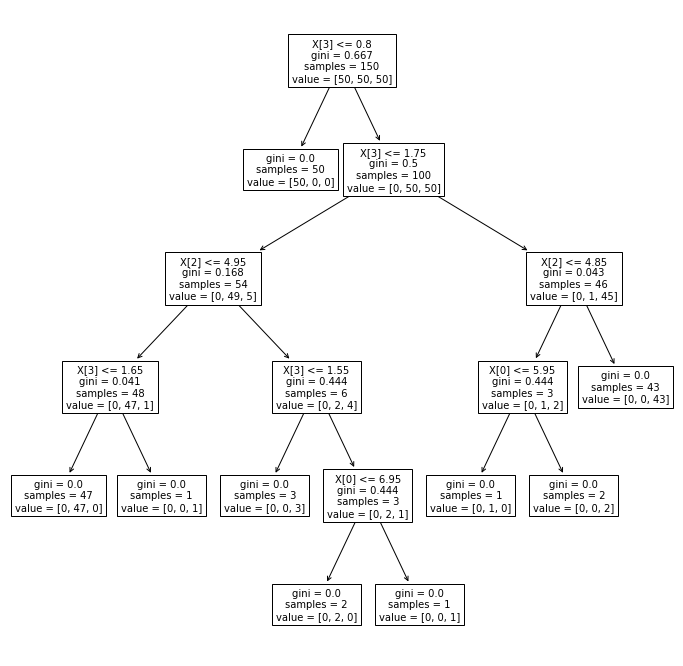

In [21]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf, fontsize=10)
plt.show()

### Наивный байесовский классификатор (Naive Bayes)

In [30]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  6  4]
 [ 0 53  1]
 [ 0  1 60]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.88      0.98      0.93        54
           R       0.92      0.98      0.95        61

    accuracy                           0.90       125
   macro avg       0.60      0.66      0.63       125
weighted avg       0.83      0.90      0.87       125



### Метод опорных векторов (Support Vector Machines)

In [34]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [35]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  7  3]
 [ 0 53  1]
 [ 0  1 60]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.87      0.98      0.92        54
           R       0.94      0.98      0.96        61

    accuracy                           0.90       125
   macro avg       0.60      0.66      0.63       125
weighted avg       0.83      0.90      0.87       125



### Логистическая регрессия (Logistic Regression)

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  8  2]
 [ 0 50  4]
 [ 0  3 58]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.82      0.93      0.87        54
           R       0.91      0.95      0.93        61

    accuracy                           0.86       125
   macro avg       0.58      0.63      0.60       125
weighted avg       0.80      0.86      0.83       125



### Разделение выборки

In [38]:
from sklearn.model_selection import train_test_split

from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([41, 43, 36])
dict_values([7, 14, 9])


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([40, 40, 40])
dict_values([10, 10, 10])


### Кросс-валидация

In [40]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 120

In [41]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        1

### Подбор гиперпараметров

In [42]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

clf.best_params_

{'n_neighbors': 4}